## Praca domowa 4

#### Autor: Szymon Matuszewski

### Zadanie 1 (1.5 pkt)



Używając funkcji z pakietu `numpy` oraz `pandas` odpowiedz na poniższe pytania dotyczące zbioru danych o grach.

a) Wybierz gry, które zostały wydane po 2015 roku przez Nintendo oraz ich sprzedaż w Ameryce była niższa niż w Europie.  

b) Jak rodzaj gry zarobił najwięcej w roku 2010?

c) Jakie typy gier sprzedają się średnio lepiej w Japonii niż w Europie? Jakie to typy gier i jaka jest ta wartość średnia. Wynikiem powinna być tabelka posortowana względem średnich. Nazwij kolumny `Typ Gry` i `Średnia sprzedaż w Japonii`.


In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/R-Ladies-Warsaw/PoweR/master/Cz%C4%99%C5%9B%C4%87%202%20-%20Formatowanie%20danych/Python/data/vgsales.csv",
                delimiter = ",").dropna().reset_index(drop = True)

In [2]:
# a)
df.loc[(df.Publisher == "Nintendo") & (df.Year > 2015) & (df.NA_Sales < df.EU_Sales)].Name.reset_index(drop=True).to_frame()

,Name
0,Mario & Sonic at the Rio 2016 Olympic Games
1,Mario & Sonic at the Rio 2016 Olympic Games
2,Teddy Together


In [3]:
# b)
df.loc[df.Year == 2010].groupby("Genre").Global_Sales.agg("sum").sort_values(ascending = False).to_frame()

,Global_Sales
Genre,
Action,117.64
Misc,96.86
Sports,92.53
Shooter,77.41
Role-Playing,70.52
Racing,34.93
Platform,31.90
Simulation,21.99
Adventure,16.57


**Odpowiedź B:** W 2010 roku najwięcej zarobiły gry akcji.

In [4]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
# c)
df.head()
df_temp = df.groupby("Genre")[["JP_Sales","EU_Sales"]].agg("mean")
df_temp = df_temp.loc[df_temp.JP_Sales > df_temp.EU_Sales]["JP_Sales"].sort_values(ascending = False).to_frame()
df_out = df_temp.rename(columns = {'Genre':'Typ Gry','JP_Sales':'Średnia sprzedaż w Japonii'})
df_out

,Średnia sprzedaż w Japonii
Genre,
Role-Playing,0.238293
Puzzle,0.099439
Strategy,0.073284


### Zadanie 2 (3.5 pkt)

Wykorzystując narzędzie do wizualizacji w Pythonie (matplotlib, seaborn) należy poprawić wykres, który był rozwiązaniem pracy domowej 2 (najlepiej poprawić swoją pracę domową, ale można też cudzą).

Rozwiązanie powinno zawierać:

1) oryginalny wykres wraz ze źródłem

2) wykres w ggplot2 wraz z linkiem do pracy domowej w której się on pojawił (kod nie jest potrzebny)

3) poprawiony wykres z punktu 2) w Pythonie

4) uzasadnienie, czemu wykres w Pythonie jest lepszy od dwóch pozostałych.

Text(0.5, 0.98, 'Transfer Market Opportunities')

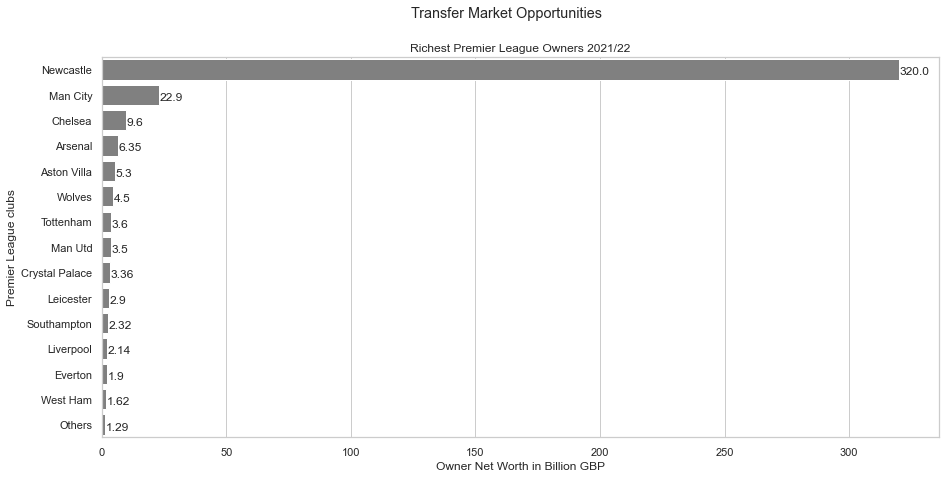

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

club = ["Newcastle","Man City","Chelsea","Arsenal","Aston Villa","Wolves",
        "Tottenham","Man Utd","Crystal Palace","Leicester","Southampton",
        "Liverpool","Everton","West Ham","Others"]
budget = [320,22.9,9.6,6.35,5.3,4.5,3.6,3.5,3.36,2.9,2.32,2.14,1.9,1.62,1.29]

def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - float(space) + 0.1
                value = (p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

sns.set(rc = {'figure.figsize': (15,7)})
sns.set_style("whitegrid")

ax = sns.barplot(y=club, x=budget, color='grey')
show_values_on_bars(ax,"h",0.3)

plt.xlabel('Owner Net Worth in Billion GBP')
plt.ylabel('Premier League clubs')
plt.title('Richest Premier League Owners 2021/22')
plt.suptitle('Transfer Market Opportunities')

### 1) 
![Oryginalny wykres.](101gg.png)
[Źródło: https://talksport.com/football/695017/](https://talksport.com/football/695017/)

### 2)
![Wykres w ggplot2 z pracy domowej nr 2.](hw2.png)
[Źródło: https://github.com/mini-pw/2022Z-DataVisualizationTechniques/tree/main/homeworks/hw2/MatuszewskiSzymon](https://github.com/mini-pw/2022Z-DataVisualizationTechniques/tree/main/homeworks/hw2/MatuszewskiSzymon)b

### 3)
![Wykres poprawiony w Pythonie.](hw4.png)

### Uzasadnienie, czemu wykres w Pythonie jest lepszy od dwóch pozostałych
Nowostworzony wykres zawiera wszystkie cechy, które zawiera wykres z pracy domowej nr 2. Poprawiłem natomiast czytelność poprzez usunięcie niepotrzebnych kolorów oraz tła z logo Premier League (dzięki badaniu z hw3 zrozumiałem, że są one niepotrzebne). Po prostu zrezygnowałem z ozdobników, które mogą wprowadzać odbiorcę w błąd.

Najnowszy wykres jest lepszy od źródłowego z takich samych powodów, dla których wykres z hw2 był lepszy od pierwowzoru. Czyli:
* rezygnacja z nieczytelnego wykresu kołowego
* dodanie wartości nad słupkami
* poprawa danych
* rezygnacja z najmniej liczących się drużyn
* podpisy osi.